<a href="https://colab.research.google.com/github/Asvikap/Image_Classification_rotten_fruit/blob/main/image_classification_rotten_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [ ]:
train = '/content/drive/MyDrive/kaggle/dataset/train'
test = '/content/drive/MyDrive/kaggle/dataset/test'

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32,(3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=32,activation = 'relu'))

classifier.add(Dense(units=64,activation = 'relu'))

classifier.add(Dense(units=128,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=6,activation = 'softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory(train,
                                                target_size=(64,64),
                                                batch_size=12,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory(test,
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical')


Training the data...

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
history=classifier.fit(training_set,
                         steps_per_epoch=100,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 100)

Epoch 1/50
100/100 [==============================] - 81s 812ms/step - loss: 0.4395 - accuracy: 0.8508 - val_loss: 0.7032 - val_accuracy: 0.7892
Epoch 2/50
100/100 [==============================] - 74s 737ms/step - loss: 0.4696 - accuracy: 0.8367 - val_loss: 0.3254 - val_accuracy: 0.8875
Epoch 3/50
100/100 [==============================] - 87s 873ms/step - loss: 0.4024 - accuracy: 0.8550 - val_loss: 0.6279 - val_accuracy: 0.7850
Epoch 4/50
100/100 [==============================] - 68s 684ms/step - loss: 0.3855 - accuracy: 0.8758 - val_loss: 0.3294 - val_accuracy: 0.8867
Epoch 5/50
100/100 [==============================] - 61s 607ms/step - loss: 0.3703 - accuracy: 0.8683 - val_loss: 0.2531 - val_accuracy: 0.9175
Epoch 6/50
100/100 [==============================] - 55s 551ms/step - loss: 0.4101 - accuracy: 0.8558 - val_loss: 0.3235 - val_accuracy: 0.8858
Epoch 7/50
100/100 [==============================] - 54s 540ms/step - loss: 0.3797 - accuracy: 0.8633 - val_loss: 0.3713 - val_ac

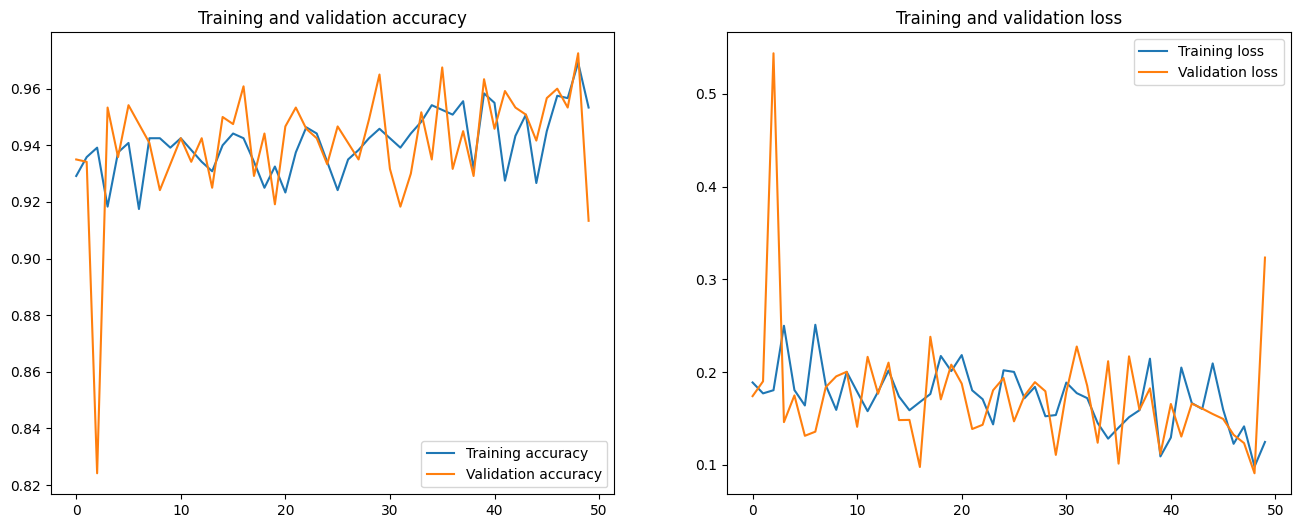

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1, 2, 1)
epochs_range = range(50)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')
#-----------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
classifier.save("model.h5")

In [ ]:
from keras.models import load_model
new_model = load_model('model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                2

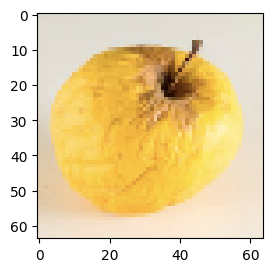

1/1 [==============================] - 0s 330ms/step
the prediction is  Rotten Apple


In [ ]:
from tensorflow.keras.utils import img_to_array,  load_img

classes = ['Fresh Apple','Fresh Banana','Fresh Orange','Rotten Apple','Rotten Banana','Rotten Orange']

filename='/content/drive/MyDrive/kaggle/dataset/test/rottenapples/Screen Shot 2018-06-07 at 2.54.41 PM.png'


test_image = load_img(filename,target_size=(64,64))
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.axis("on")
plt.show()
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model.predict(test_image)
result1 = result[0]


for i in range(6):

            if result1[i] == 1.:
                break;
prediction = classes[i]
print("the prediction is ", prediction)